<div style = "color: darkblue; text-align: center; background-color : lightgray; padding: 20px; font-family: Tahoma">
  
         
<h3 style = "color: darkblue; text-align: center"> Name: Francis Owino</h3>
<p style = "color: darkblue; text-align: center"> Student No: 23250844</p>
 
            
</div>


<h1 style = "color: darkblue">1. Data Exploration</h1>

For this assignment, I will make use of various libraries such as pandas for data manipulation, matplotlib and seaborn for visualization, numpy for mathematical operations, sklean for machine learning related tasks such as linear regrssison and diagnostic tests.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot") # selecting style ggplot
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
mtcars = pd.read_csv("C://Users/user/Desktop/MSc Data Science & Analytics/CS401 - Machine Learning & Neural Networks/Assignments/mtcars.csv")

In [3]:
mtcars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
# Dropping the car model column using the panda's drop  function and setting inplace to True

In [5]:
mtcars.drop(columns = ['model'], axis = 1, inplace = True)

In [44]:
mtcars.shape   # getting the number of rows and columns

(32, 11)

In [45]:
mtcars.info()  # getting the structure of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 2.9 KB


In [46]:
mtcars.isna().sum()  # Checking for missing observations

mpg     0
cyl     0
disp    0
hp      0
drat    0
wt      0
qsec    0
vs      0
am      0
gear    0
carb    0
dtype: int64

The mtcars dataset contains 32 rows and 11 columns. All the variables are either floats or integers with no missing observations.

In [42]:
mtcars.describe()   # getting the summary statistics

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


The above table shows the summary statistics of the dataset.There seems to be no much variability in terms of the data. For this reason, standardization may not be really neccesary. The histograms also show the distribution of these variables. 

In [9]:
# Creating Scatter plots

In [10]:
y = mtcars['mpg']  # the target variable

In [11]:
X = mtcars.drop(columns='mpg') # Independent variables

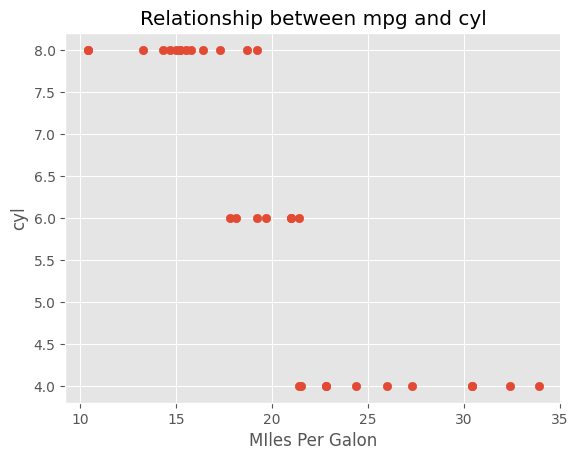

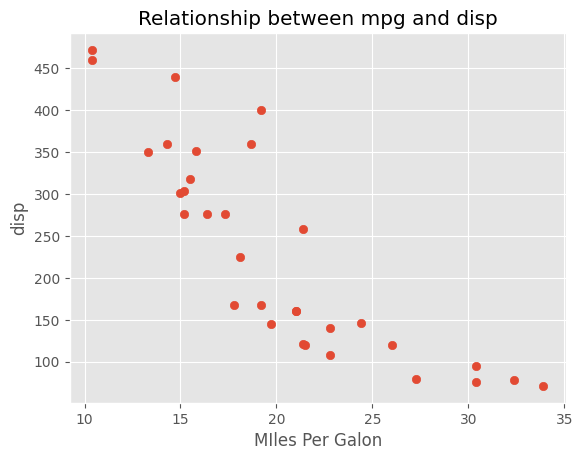

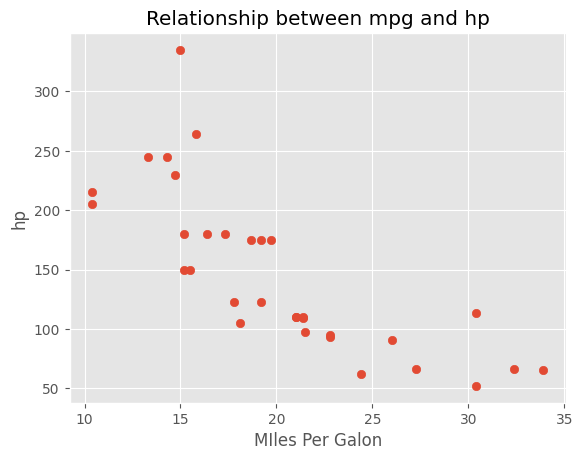

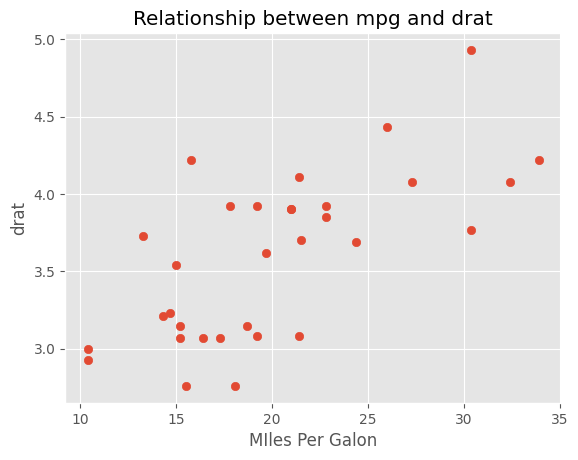

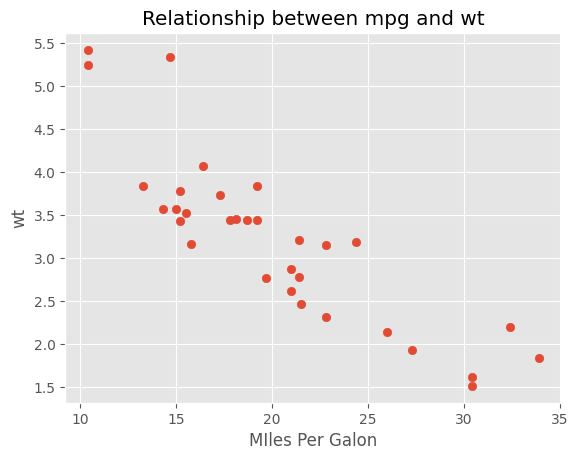

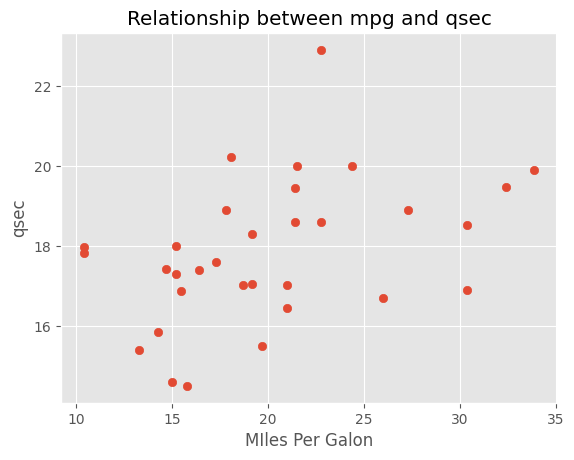

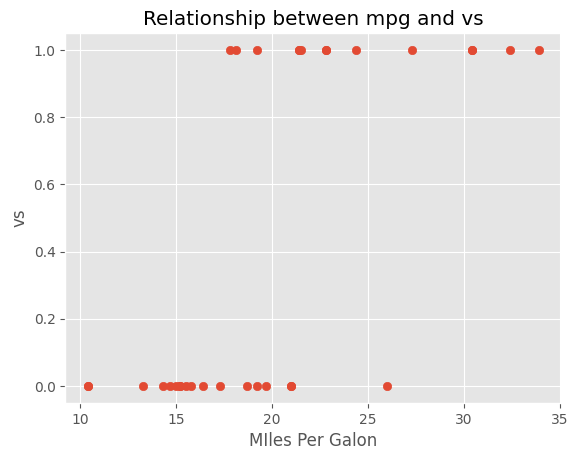

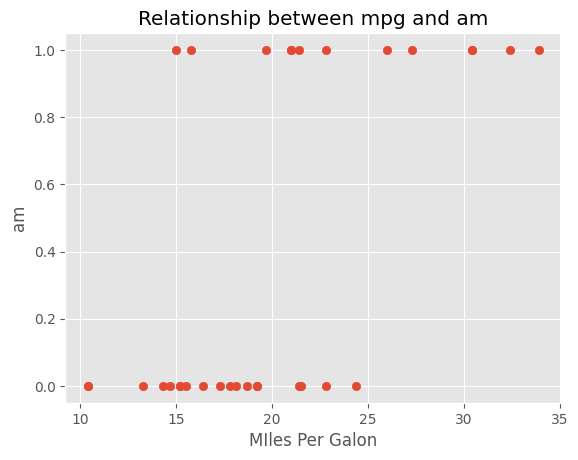

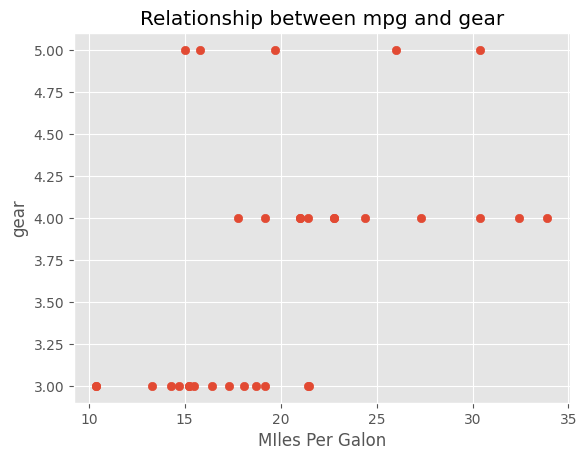

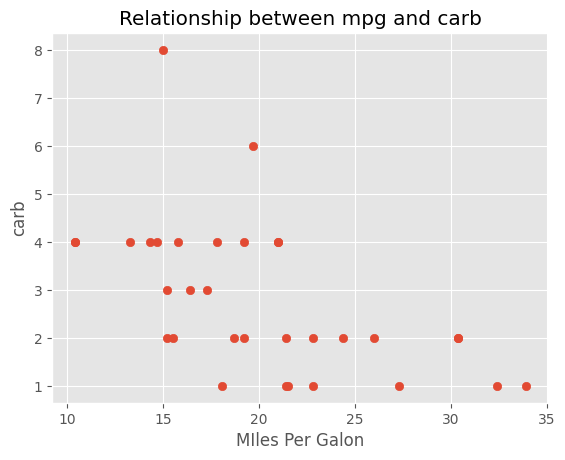

In [12]:
for col in X.columns:
    plt.scatter(y, X[col])
    plt.title(f"Relationship between mpg and {col}")
    plt.xlabel("MIles Per Galon")
    plt.ylabel(col)
    plt.show()

The scatterplot shows that the relationship between miles per gallon the dependent variable and the independent variables in most cases is linear. This is except for variables such as gear – (number of forward gears, which are 4, 3 or 5), am – (transmission whether manual or automatic)  vs – (engine, whether v shaped or straight)  and cyl – (number of cylinders are either 6, 4 or 8) which are categorical. Apart from the visual inspection, I would want to see the actual correlation coefficients. To do this, I utilize the pandas correlation function then draw a heatmap using seaborn as shown below.

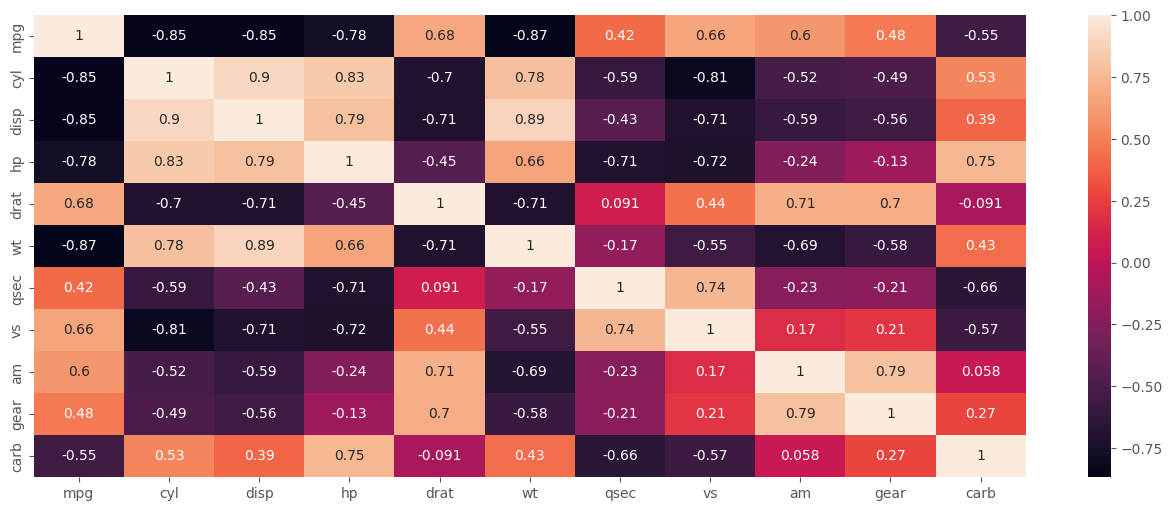

In [13]:
plt.figure(figsize = (16,6))
sns.heatmap(mtcars.corr(), annot = True)
plt.show()


From the heatmap, the variable that has the highest correlation with miles per gallon is weight (wt). The tow variables are negatively correlated. This is true since heavy cars are less fuel efficient.

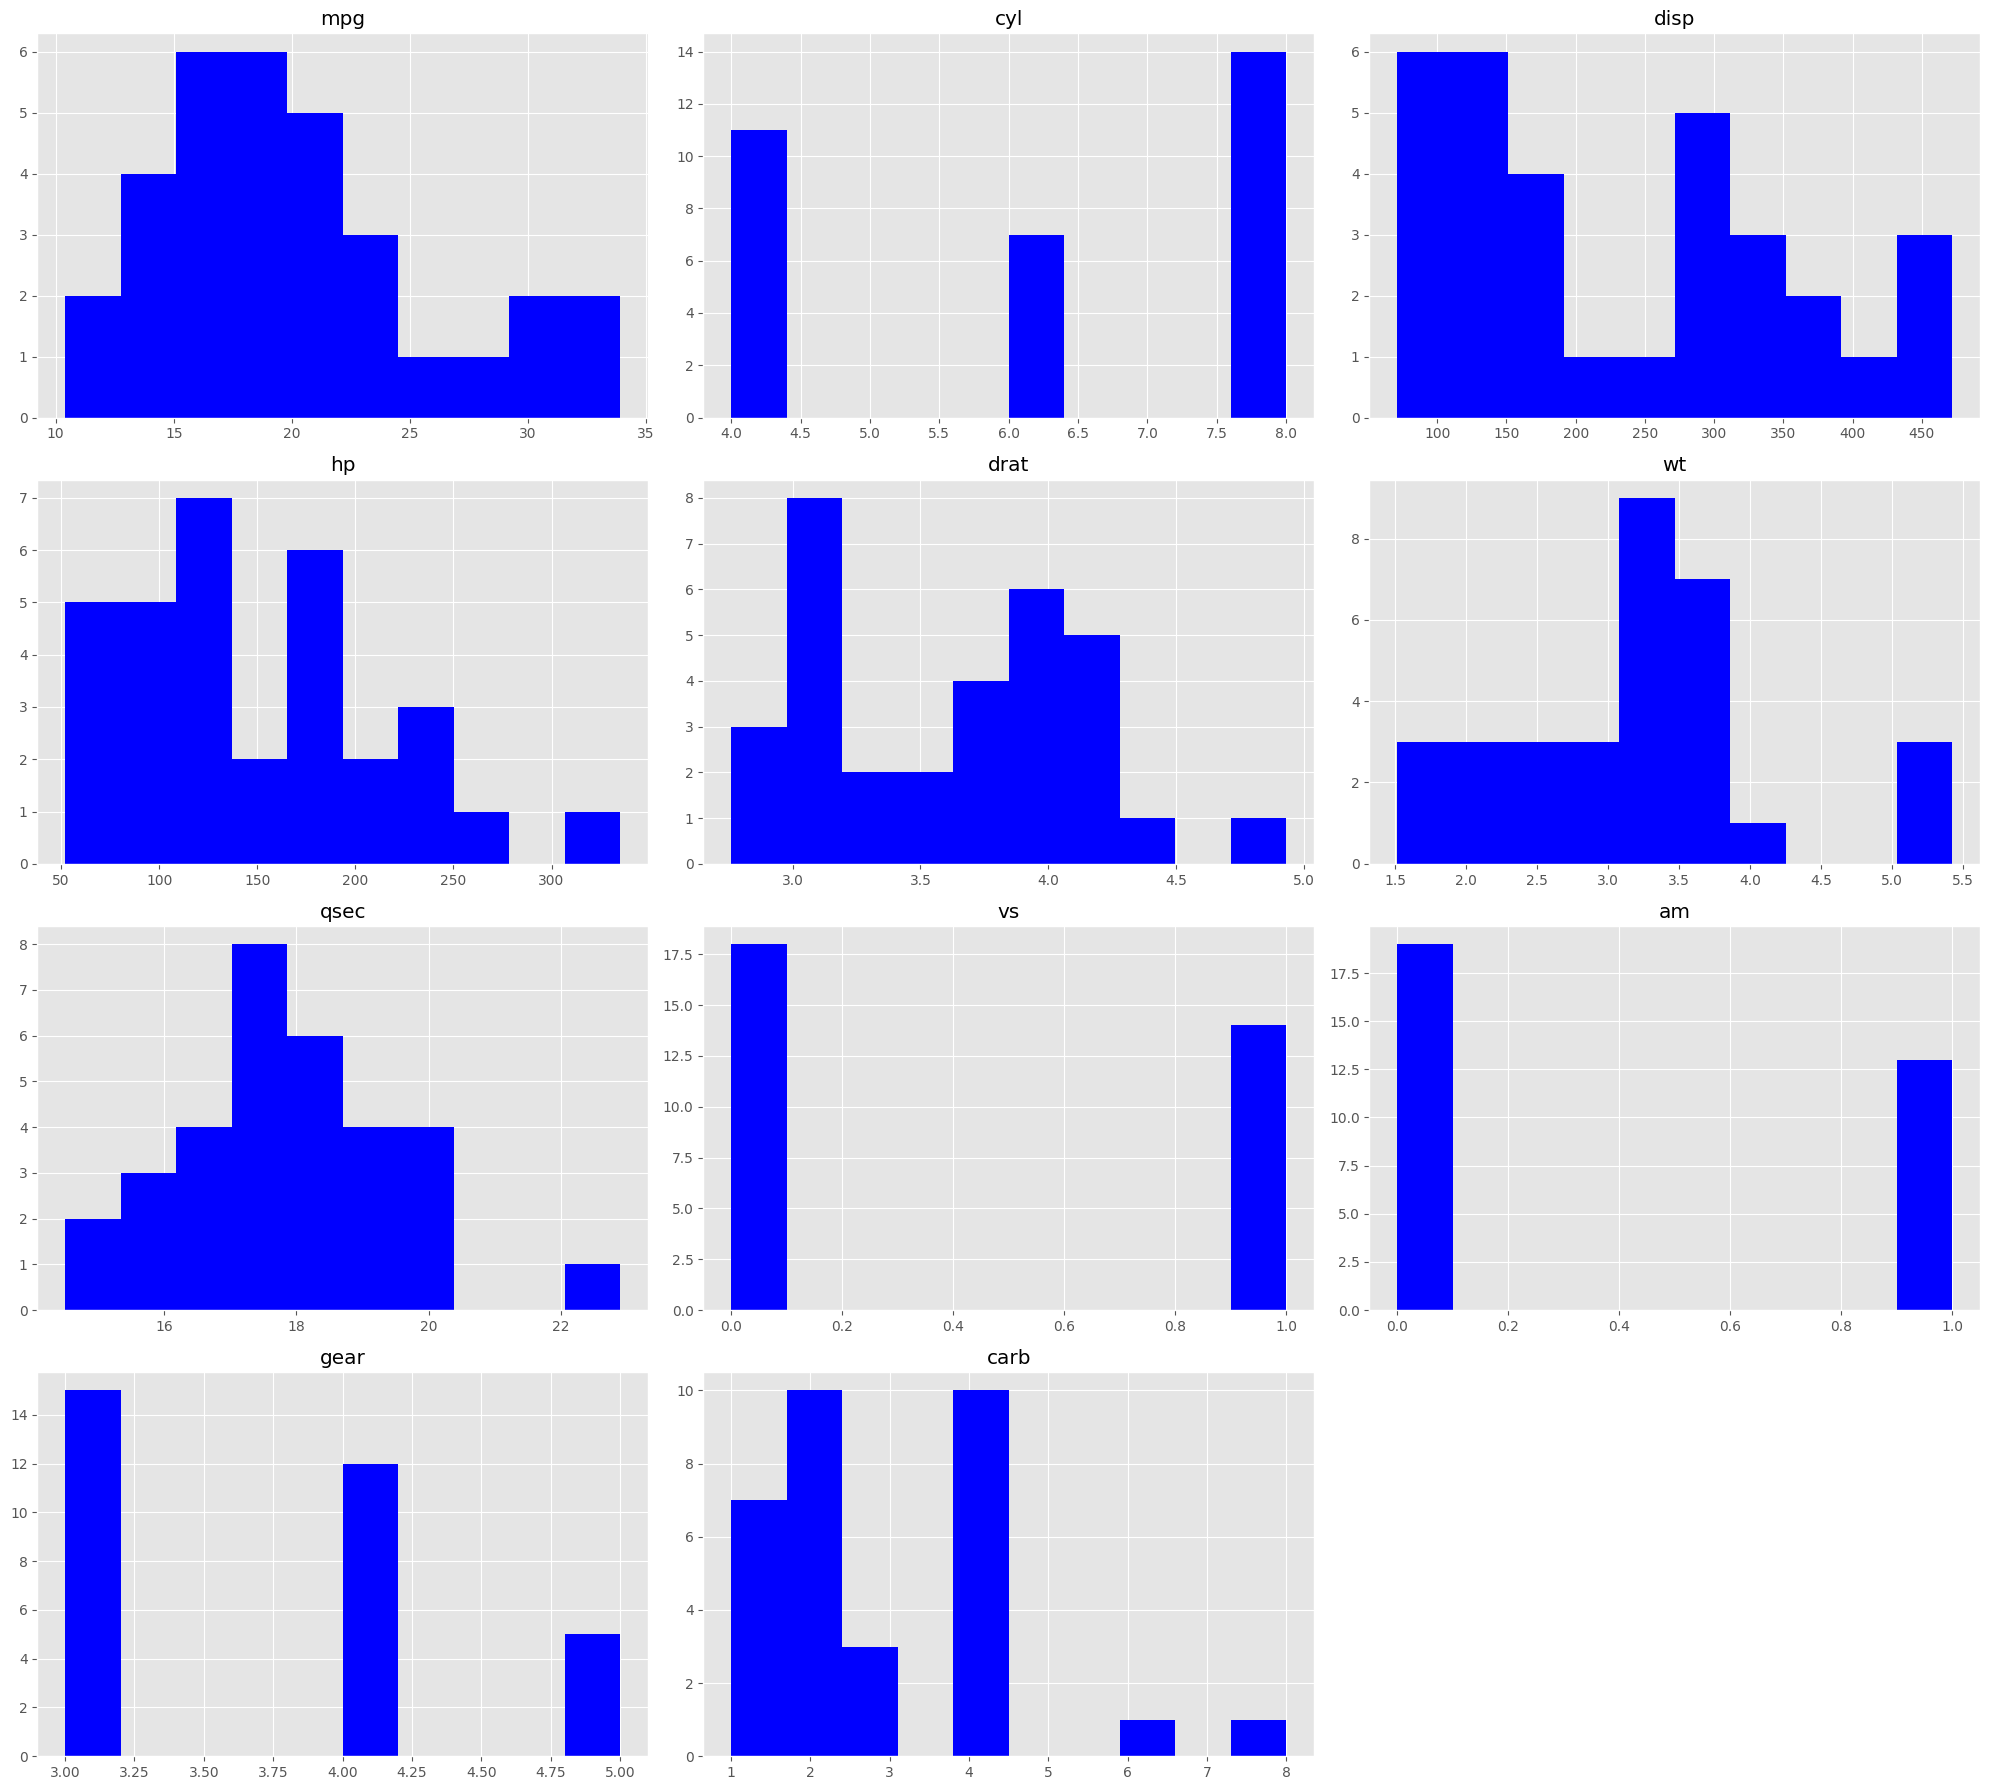

In [61]:
mtcars.hist(figsize= (20,18), color = "blue")
plt.tight_layout()
plt.show()

<h1 style = "color: darkblue">2. Simple Linear Regression</h1>

In this simple linear regression, I will use miles per gallon as my dependent variable and weight as the independent variable. But before that, I need to split my data into training and testing sets (80%  training  and 20% testing ). I will select a random state of 12 for reproducibility. After splitting the data into training and testing sets, I initilialize my simple linear regression model as slr. I train the model on the training data.

In [14]:
mpg = mtcars[['mpg']]
wt = mtcars[['wt']]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(wt, mpg, test_size=.2, random_state=12)

In [16]:
slr = LinearRegression()

In [17]:
slr.fit(X_train, y_train)

LinearRegression()

In [18]:
intercept  = slr.intercept_   # Intercept
slope = slr.coef_             # Slope

In [19]:
print(f"The Simple Linear Regression Model has an  intercept of  {intercept[0]} and a Slope of {slope[0][0]}")

The Simple Linear Regression Model has an  intercept of  37.005884730313866 and a Slope of -5.318923637880358


The relationship between miles per gallon and weight can be expressed as: 
**Mpg = 37.006 - 5.32 * wt**

There is an inverse relationship between fuel efficiency which is measured in miles per gallon and the weight of a vehicle. As the weight of a vehicle increases, the miles per gallon tend to decrease. Heavier vehicles tend to consume more fuel and have lower fuel effienncy compared to ligter vehicles. Specifically, a 1,000 pounds increase in the weight of a vehicle leads to reduction in about 5.32 miles per gallon. 

The next step is to carry out model evaluation using three evaluation matrics which are mean absolute error, mean squared error and the r score which is the coefficient of dterminantion. To do this, I need to make predictions using the testing set on the trained model. This is done below.


In [20]:
y_predicted = slr.predict(X_test)

In [21]:
mae = mean_absolute_error(y_test, y_predicted)
mse = mean_squared_error(y_test, y_predicted)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_predicted)

In [22]:
metrics = pd.DataFrame(data=[mae, mse, rmse, r2],              #  Converting my metrics into a dataframe
                       columns=['Eval_Metrics'],
                      index = ['Mae', 'Mse', "Rmse", "R2"])

In [23]:
metrics

,Eval_Metrics
Mae,2.044783
Mse,6.138869
Rmse,2.477674
R2,0.839016


From the above metrics, the mean absolute error indicates that my model' prediction are off by about 2.04 units. A lower mean absolute error is usually desirable. The mean squared error quantifies the average squared differences between predcited and actual values. My model has a mean squared error of 6.13. This value is usually higher than the mean absolute error. The root mean squared error is the squareroot od mean squared error and is the measure of the average error. In this case it is about 2.48 units. 

Finally, R squared is the meaure of goodness of fit, that is, how well my model fits the data. In this case about 83.9 % percent variation in miles per gallon in explained my variation is the vehicle's weight. The rest of the variation is not explained.

<h1 style = "color: darkblue">3. Multiple Linear Regression</h1>

For multiple linear regresssion, miles per gallon is still the dependent variable and the rest of the variables as independent. This is necessary since there other factors influencing fuel efficieny in vehicles other than vehicle's weight alone. 

In [24]:
y = mtcars[['mpg']]                      # the target variable
X = mtcars.drop(columns=['mpg'])         # dropping the target variable to remain with independent variables

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=13) # splitting the data into training and testing

In [26]:
model = LinearRegression()             # model instantiation

In [27]:
model.fit(X_train, y_train)           # Training the model

LinearRegression()

In [28]:
model.intercept_                     # Model intercept

array([-31.64490692])

In [29]:
model_params = pd.DataFrame(data = model.coef_.reshape(-1,1),
                           index = model.feature_names_in_)

In [30]:
model_params

,0
cyl,1.624918
disp,0.011363
hp,0.003008
drat,3.438984
wt,-3.715782
qsec,1.652321
vs,0.123337
am,2.787300
gear,3.209222
carb,-1.410556


The above are the coefficients of the multiple regresssion. The coefficient of weight is still negative though not as high in the simple linear regression. This is due to the fact that other variables have also a signficiant effect on miles per gallon. 

The next step is to carry out model evaluation using three evaluation matrics which are mean absolute error, mean squared error and the r score which is the coefficient of dterminantion. To do this, I need to make predictions using the testing set on the trained model. This is done below.


In [31]:
y_predict = model.predict(X_test)

In [32]:
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_predict)

In [33]:
Metrics = pd.DataFrame(data = [mae, mse, rmse, r2],
                      index  = ['Mae', 'Mse', "Rmse", "R2"],
                      columns = ['Evaluation Metrics'])

In [34]:
Metrics

,Evaluation Metrics
Mae,3.674024
Mse,21.222205
Rmse,4.606756
R2,0.178369


From the above metrics, the mean absolute error indicates that my model' prediction are off by about 3.67 units. A lower mean absolute error is usually desirable. The mean squared error quantifies the average squared differences between predcited and actual values. My model has a mean squared error of 21.22. This value is usually higher than the mean absolute error. The root mean squared error is the squareroot od mean squared error and is the measure of the average error. In this case it is about 4.61 units. 

Finally, R squared is the meaure of goodness of fit, that is, how well my model fits the data. In this case about 17.8% percent variation in miles per gallon in explained my variation is the vehicle's weight. The rest of the variation is not explained.

<h1 style = "color: darkblue">4. Discussion and Conclusion</h1>

The simple linear regression model has lower mean absolute error, mean squared error and root mean squared error compared to the multiple linear regression. This means that the simple linear regression provides a better fit for the data making it more accurate in predicting the dependent variable based on weight as the independent variable.  This model (Simple Linear Regression) is highly interpretable since it models a straightforward linear relationship between miles per gallon and weight of vehicles. The slope of the model indicates that a unit change in the independent variable leads to a change in the dependent variable by the value of the slope.

However, the model is too simplistic. It assumes that the relationship between miles per gallon and weight of the car is strictly linear and the may not be able to capture more complex relationships. To what extent does the weight of a car lead to increased fuel consumption for example? It also assumes that the miles per gallon which is the dependent variable is only influenced by weight of the vehicle.

On the other hand, the multiple linear regression has higher mean absolute error, mean standard error and the root mean standard error. This means that the model provides a less accurate fit of the data, It can however handle multiple independent variables which may be required for capturing complex relationships.  The model is less interpretable since it involves multiple independent variables each with a coefficient. It is a little bit difficult when I consider the combined effects of multiple variable on the dependent variables. In multiple linear regression, the trade off here is between accuracy and complexity. The model has low prediction accuracy but models complex relationship between the dependent variable and the independent variables.


In summary, the simple linear regression model performs well on the testing dataset and is easy to interpret. On the other hand, the multiple linear regression model has lower performs poorly on the testing date is a bit difficult to interpret. In terms of the trade-off between simplicity and complexity, the simple linear regression is simplistic and cannot model complex relationship while multiple linear regression models complex relationship at the expense of simple relationships. 


The following insights can be gained from the assignment:

1. The evaluation metrics clearly indicates that the simple linear regression model outperforms multiple linear regression in terms of accuracy and precision. The simple linear regresssion model has a lower mean absolute error, mean standard error, root mean squared error and a higher R Squared implying better fit to the data. This may be an insight that  the simple linear regression is most appropriate when proedciting fuel efficiency based on a single independent variable.

2. Simple linear regression offers a high degree of interpretability. In my simple linear regrsssion model, it is very easy to interepret the effect of a vehicle's weight on fuel efficiency. 

3. That the comparison highlights a trade-off between model simplicity and accuracy. The simple linear regresssion model is interpretable and accurate for single variable analysis while the multiple linear model is preferred for more complex analysis. That is why multiple linear regression is suitable while predicting fuel efficiency.

3. Predicting fuel efficiency in real world requires a combination of factors rather than a single-factor analysis. 

4. There is need to carefully select the independent variables that are most relevant in predicting fuel efficiency to ensure high accuracy of the multiple linear regresssion model.